In [6]:
#Read before running
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
 
#read red wine data, assign wine-type label and new column names
red_wine_data <- read_delim("winequality-red (1).csv", delim = ";")%>%
                    mutate(quality = quality)%>%
                    mutate(wine_type = as.factor("red"))%>%
                    setNames (c("fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol", "quality", "wine_type"))

#read white wine data, assign wine-type label and new column names
white_wine_data <- read_delim("winequality-white.csv", delim = ";")%>%
                    mutate(quality = quality)%>%
                    mutate(wine_type = as.factor("white"))%>%
                    setNames (c("fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol", "quality", "wine_type"))
#combine both wine types into one dataframe
wine_data <- rbind(red_wine_data, white_wine_data)

#split dataset into training and testing data
wine_split <- initial_split(wine_data, prop = 0.75, strata = quality)
wine_training <- training(wine_split)
wine_testing <- testing(wine_split)

glimpse(wine_training)

classes <- wine_training %>% pull(quality) %>% levels()

num_obs <- nrow(wine_training)

wine_training %>%
  group_by(quality) %>%
  summarize(
    count = n(),
    percentage = n() / num_obs * 100
  )

missing_data <- wine_training %>%
    select(fixed_acidity, volatile_acidity, residual_sugar, free_sulfur_dioxide, total_sulfur_dioxide, alcohol)%>%
    summary()


options(repr.plot.width = 14, repr.plot.height = 8)

predictors <- wine_training %>%
    select(fixed_acidity, volatile_acidity, residual_sugar, free_sulfur_dioxide, total_sulfur_dioxide, alcohol)

fixed_acidity_plot <- predictors %>% ggplot(aes(x = fixed_acidity)) +
    geom_histogram(binwidth = .5)+
    xlab("Fixed Acidity (g(tartaric acid)/dm3)")+
    ylab("Count")+
    ggtitle("Fixed Acidity Distribution")
 
volatile_acidity_plot <- predictors %>% ggplot(aes(x = volatile_acidity)) +
    geom_histogram(binwidth = .5)+
    xlab("Volatile Acidity (g(acetic acid)/dm3)")+
    ylab("Count")+
    ggtitle("Volatile Acidity Distribution")

residual_sugar_plot <- predictors %>% ggplot(aes(x = residual_sugar)) +
    geom_histogram(binwidth = .5)+
    xlab("Residual sugar (g/dm3)")+
    ylab("Count")+
    ggtitle("Residual Sugar Distribution")

free_sulfur_dioxide_plot <- predictors %>% ggplot(aes(x = free_sulfur_dioxide)) +
    geom_histogram(binwidth = .5)+
    xlab("Free sulfur dioxide (mg/dm3)")+
    ylab("Count")+
    ggtitle("Free Sulfur Dioxide Distribution")

total_sulfur_dioxide_plot <- predictors %>% ggplot(aes(x = total_sulfur_dioxide)) +
    geom_histogram(binwidth = .5)+
    xlab("Total sulfur dioxide (mg/dm3)")+
    ylab("Count")+
    ggtitle("Total Sulfur Dioxide Distribution")

alcohol_plot <- predictors %>% ggplot(aes(x = alcohol)) +
    geom_histogram(binwidth = .5)+
    xlab("Alcohol (%vol)")+
    ylab("Count")+
    ggtitle("Alcohol Distribution")


predictor_distribution <- plot_grid(fixed_acidity_plot, volatile_acidity_plot, residual_sugar_plot,free_sulfur_dioxide_plot, total_sulfur_dioxide_plot, alcohol_plot)


Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)



Rows: 4,873
Columns: 13
$ fixed_acidity        <dbl> 7.8, 11.2, 7.4, 7.4, 7.9, 7.3, 7.8, 6.7, 7.8, 8.…
$ volatile_acidity     <dbl> 0.880, 0.280, 0.700, 0.660, 0.600, 0.650, 0.580,…
$ citric_acid          <dbl> 0.00, 0.56, 0.00, 0.00, 0.06, 0.00, 0.02, 0.08, …
$ residual_sugar       <dbl> 2.6, 1.9, 1.9, 1.8, 1.6, 1.2, 2.0, 1.8, 1.6, 1.8…
$ chlorides            <dbl> 0.098, 0.075, 0.076, 0.075, 0.069, 0.065, 0.073,…
$ free_sulfur_dioxide  <dbl> 25, 17, 11, 13, 15, 15, 9, 15, 9, 35, 6, 17, 29,…
$ total_sulfur_dioxide <dbl> 67, 60, 34, 40, 59, 21, 18, 65, 29, 103, 29, 56,…
$ density              <dbl> 0.9968, 0.9980, 0.9978, 0.9978, 0.9964, 0.9946, …
$ pH                   <dbl> 3.20, 3.16, 3.51, 3.51, 3.30, 3.39, 3.36, 3.28, …
$ sulphates            <dbl> 0.68, 0.58, 0.56, 0.56, 0.46, 0.47, 0.57, 0.54, …
$ alcohol              <dbl> 9.8, 9.8, 9.4, 9.4, 9.4, 10.0, 9.5, 9.2, 9.1, 10…
$ quality              <dbl> 5, 6, 5, 5, 5, 7, 7, 5, 5, 7, 4, 6, 6, 5, 5, 5, …
$ wine_type            <fct>

`summarise()` ungrouping output (override with `.groups` argument)



quality,count,percentage
<dbl>,<int>,<dbl>
3,19,0.38990355
4,159,3.26287708
5,1610,33.03919557
6,2127,43.64867638
7,808,16.58116150
8,146,2.99610096
9,4,0.08208496


**Methods**

Given that the response variable (wine quality based on subjective sensory data) is quantitative, we will use regression for our predictions. All of the other variables in this dataset appear to have the potential to affect the taste and/or smell of wine. Therefore, to begin our analysis, we have visualized each of the predictor variables as scatter plots with the predictor variable on the x-axis and wine quality on the y-axis.

[1] -0.08651427

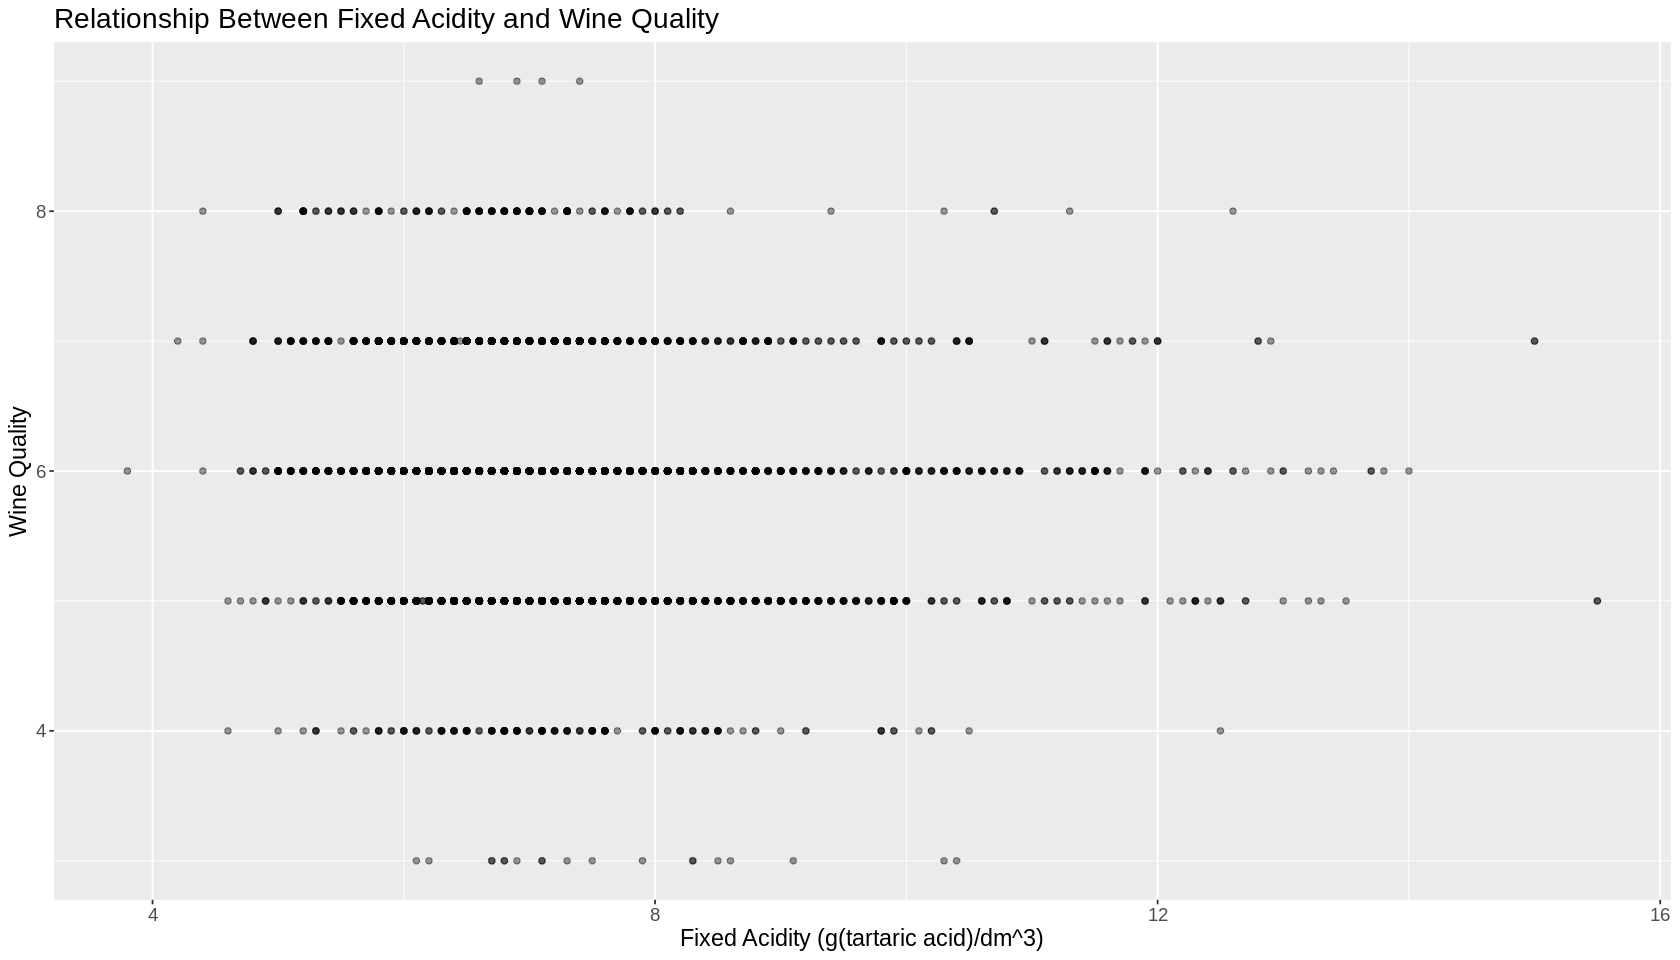

[1] -0.2635425

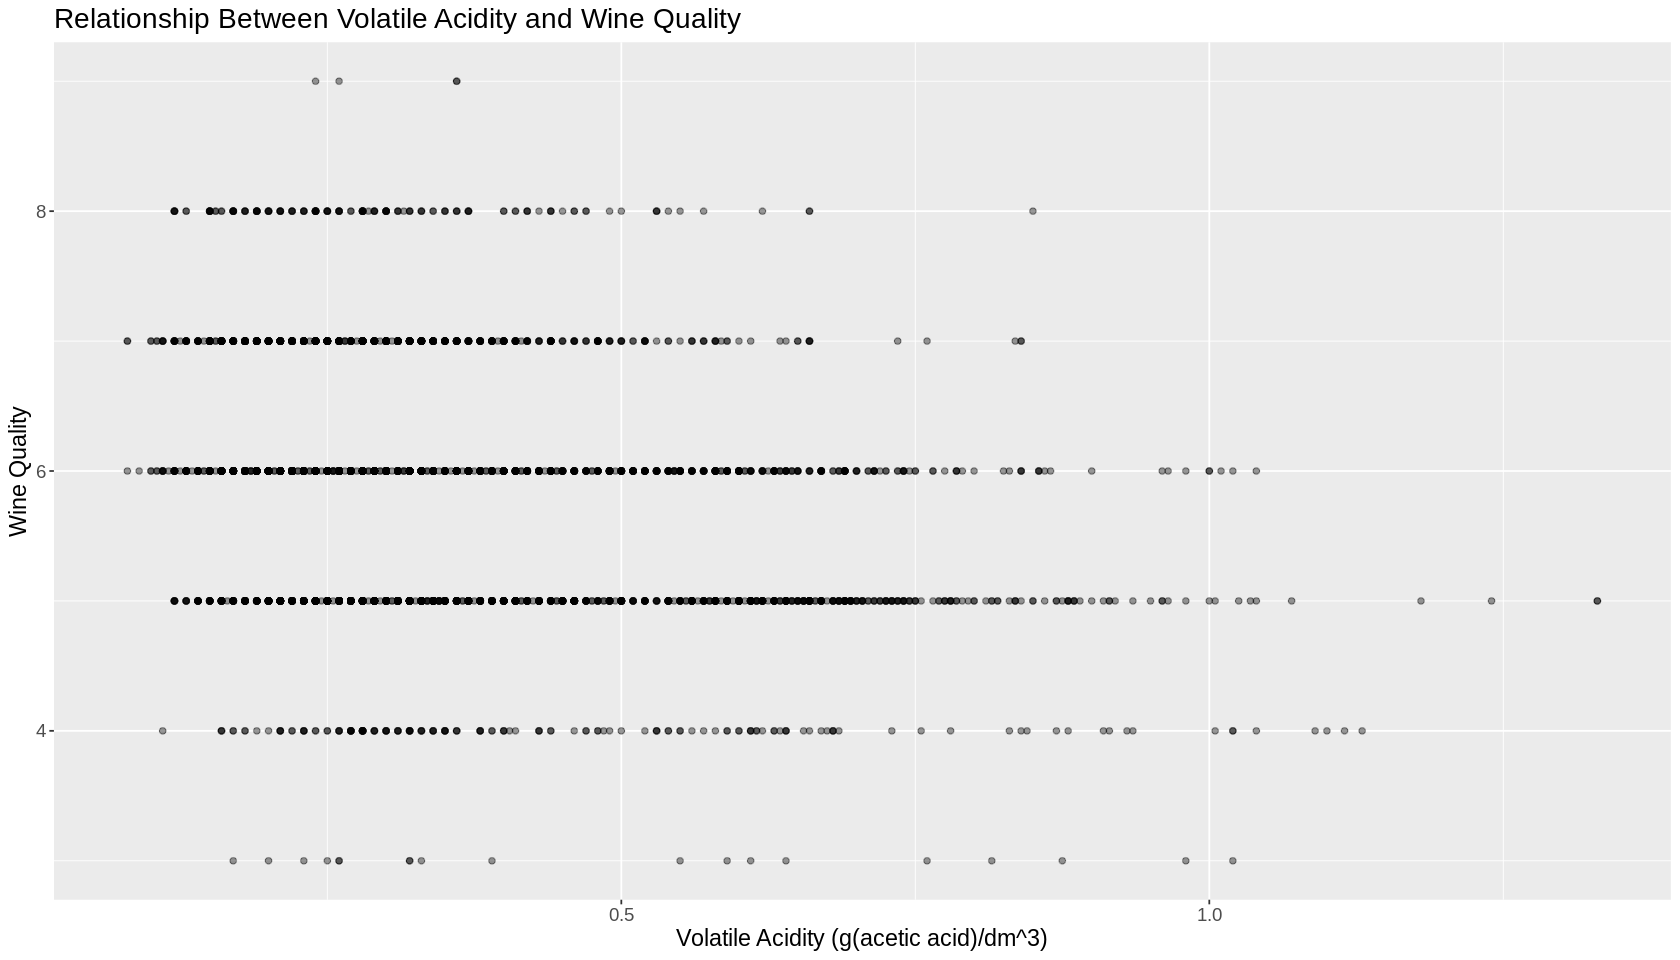

[1] -0.04411673

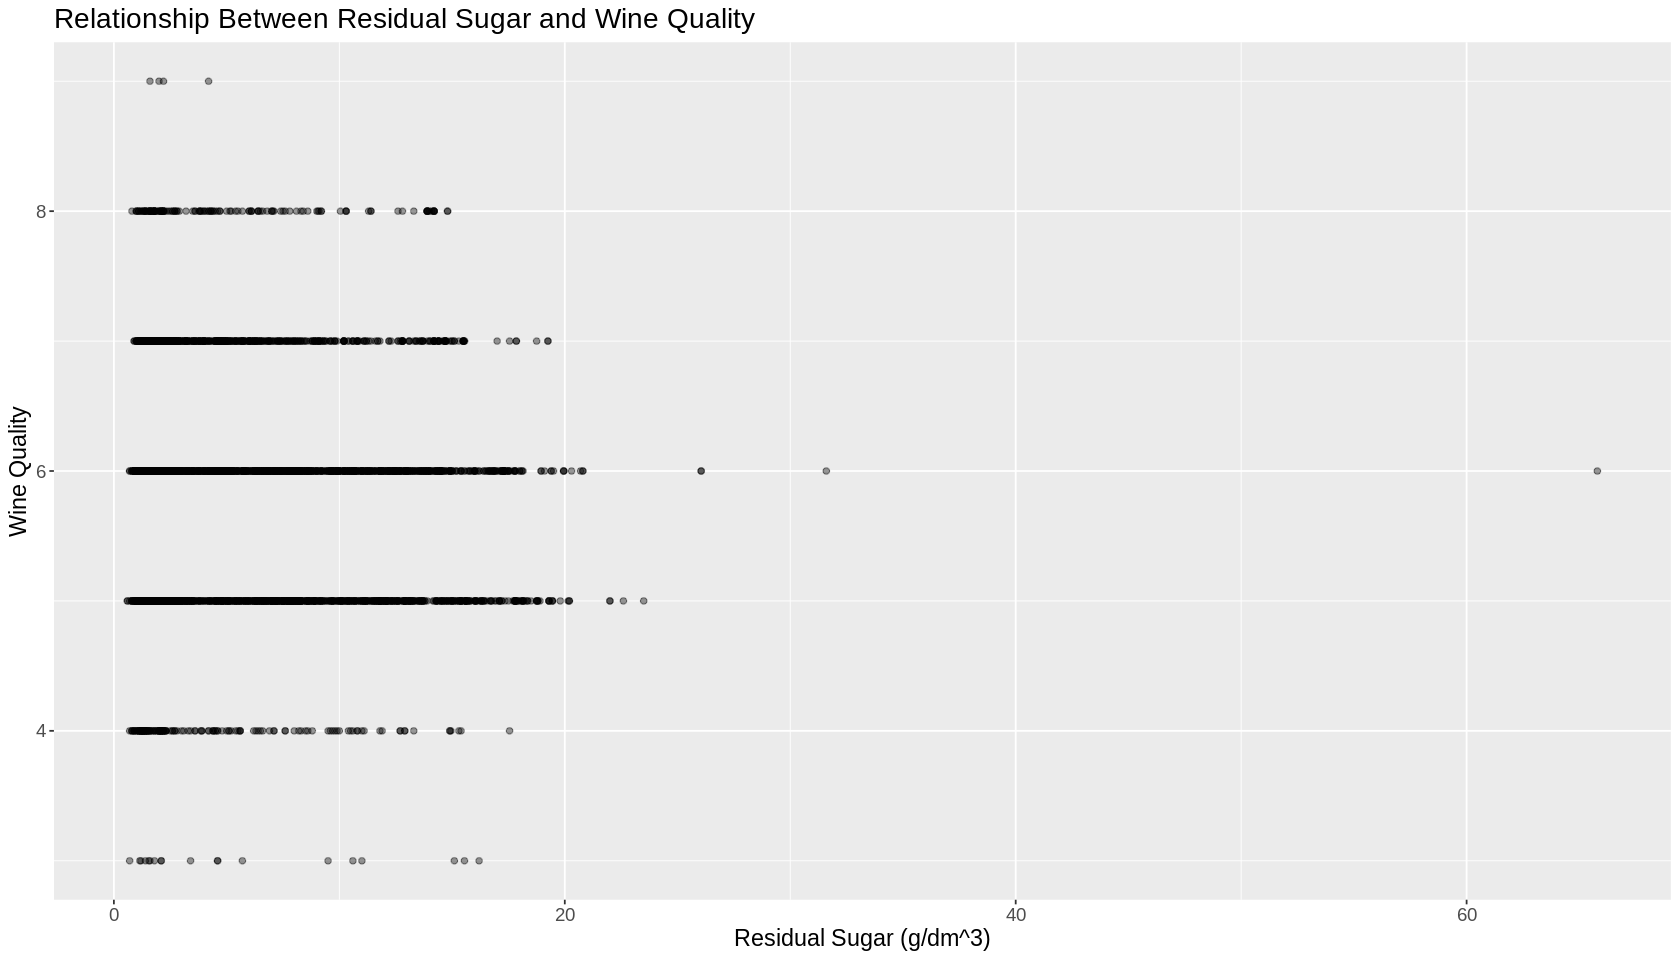

[1] 0.07795902

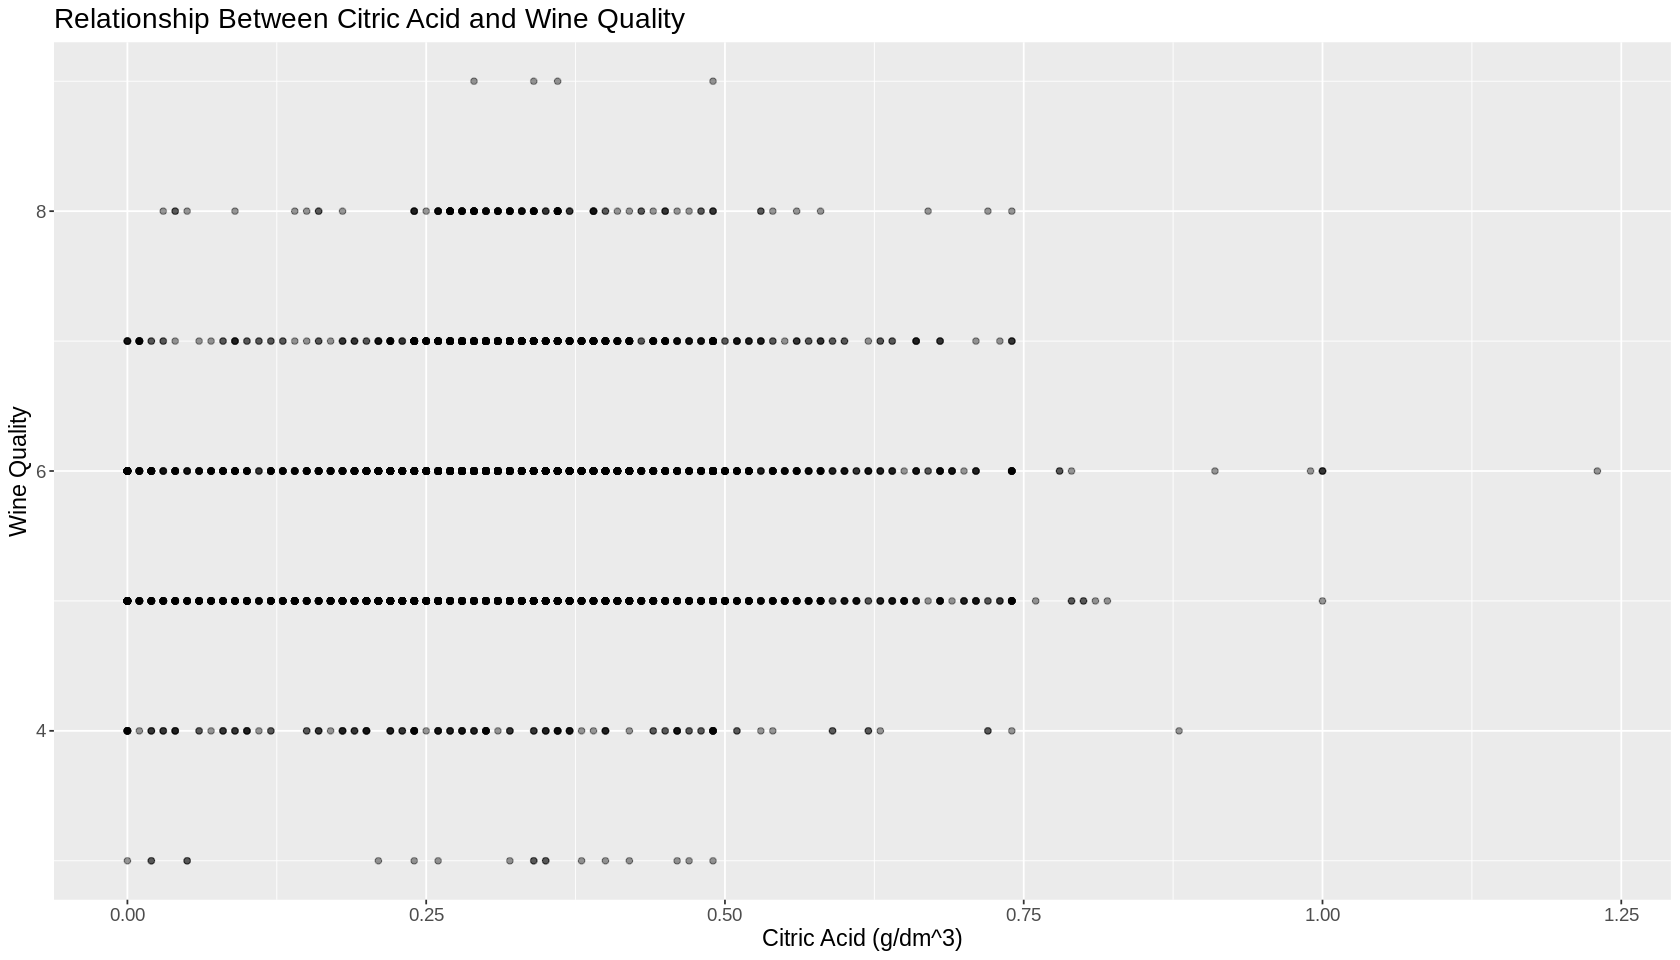

[1] -0.2036265

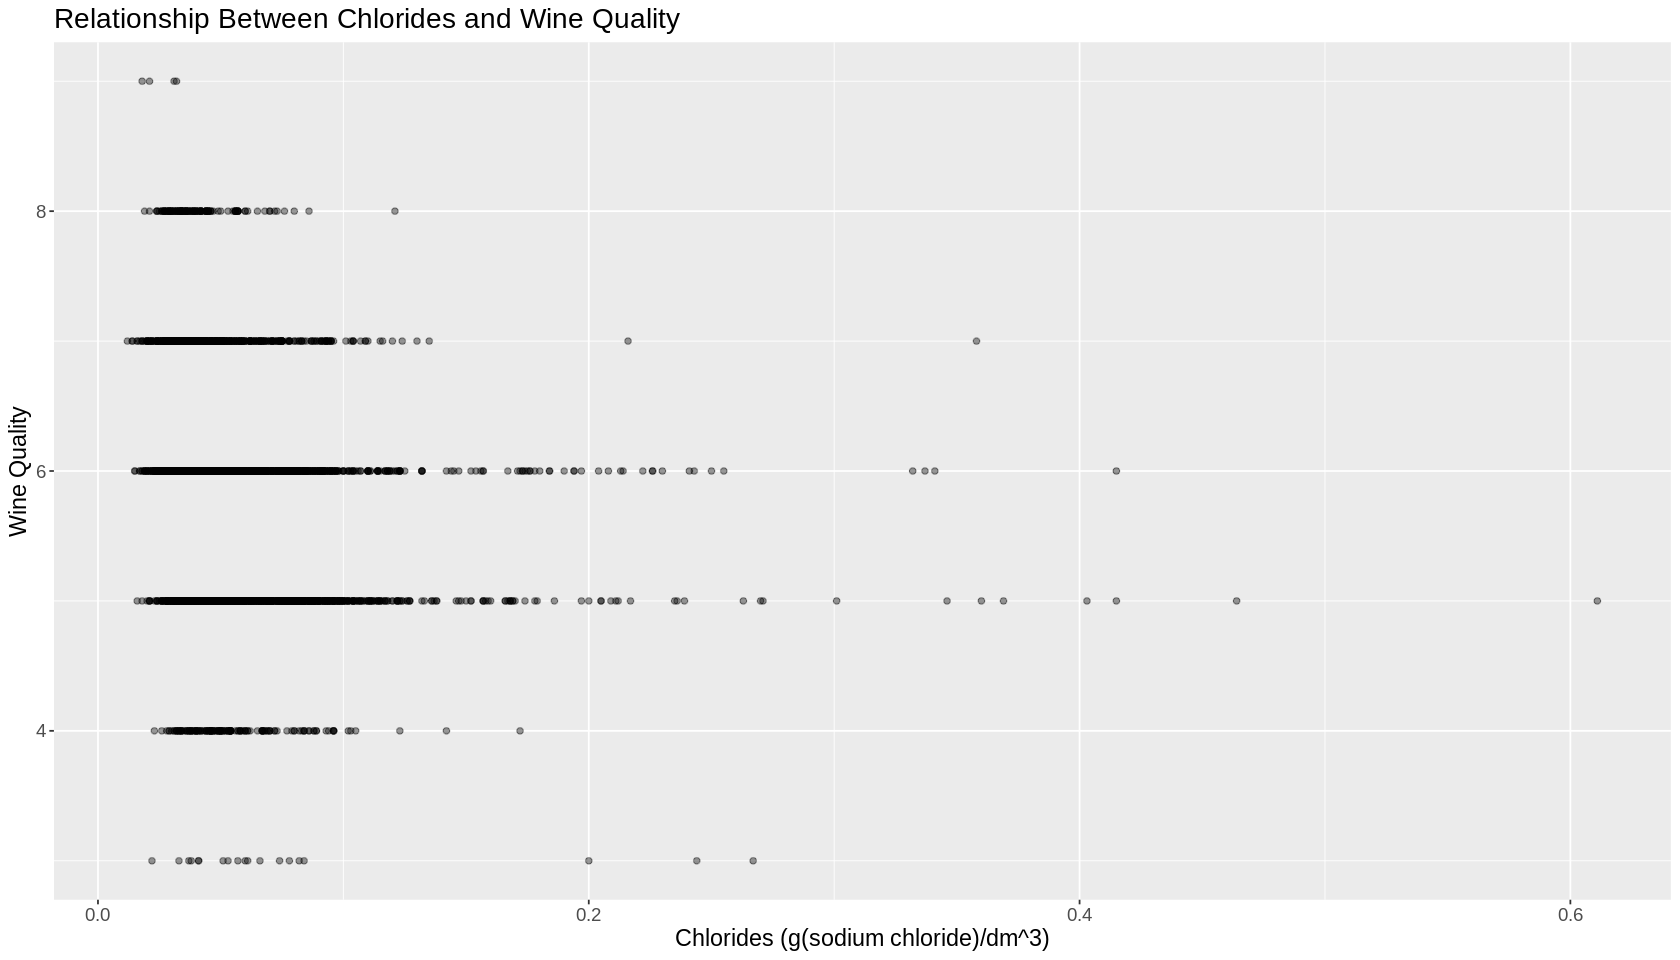

[1] 0.06309529

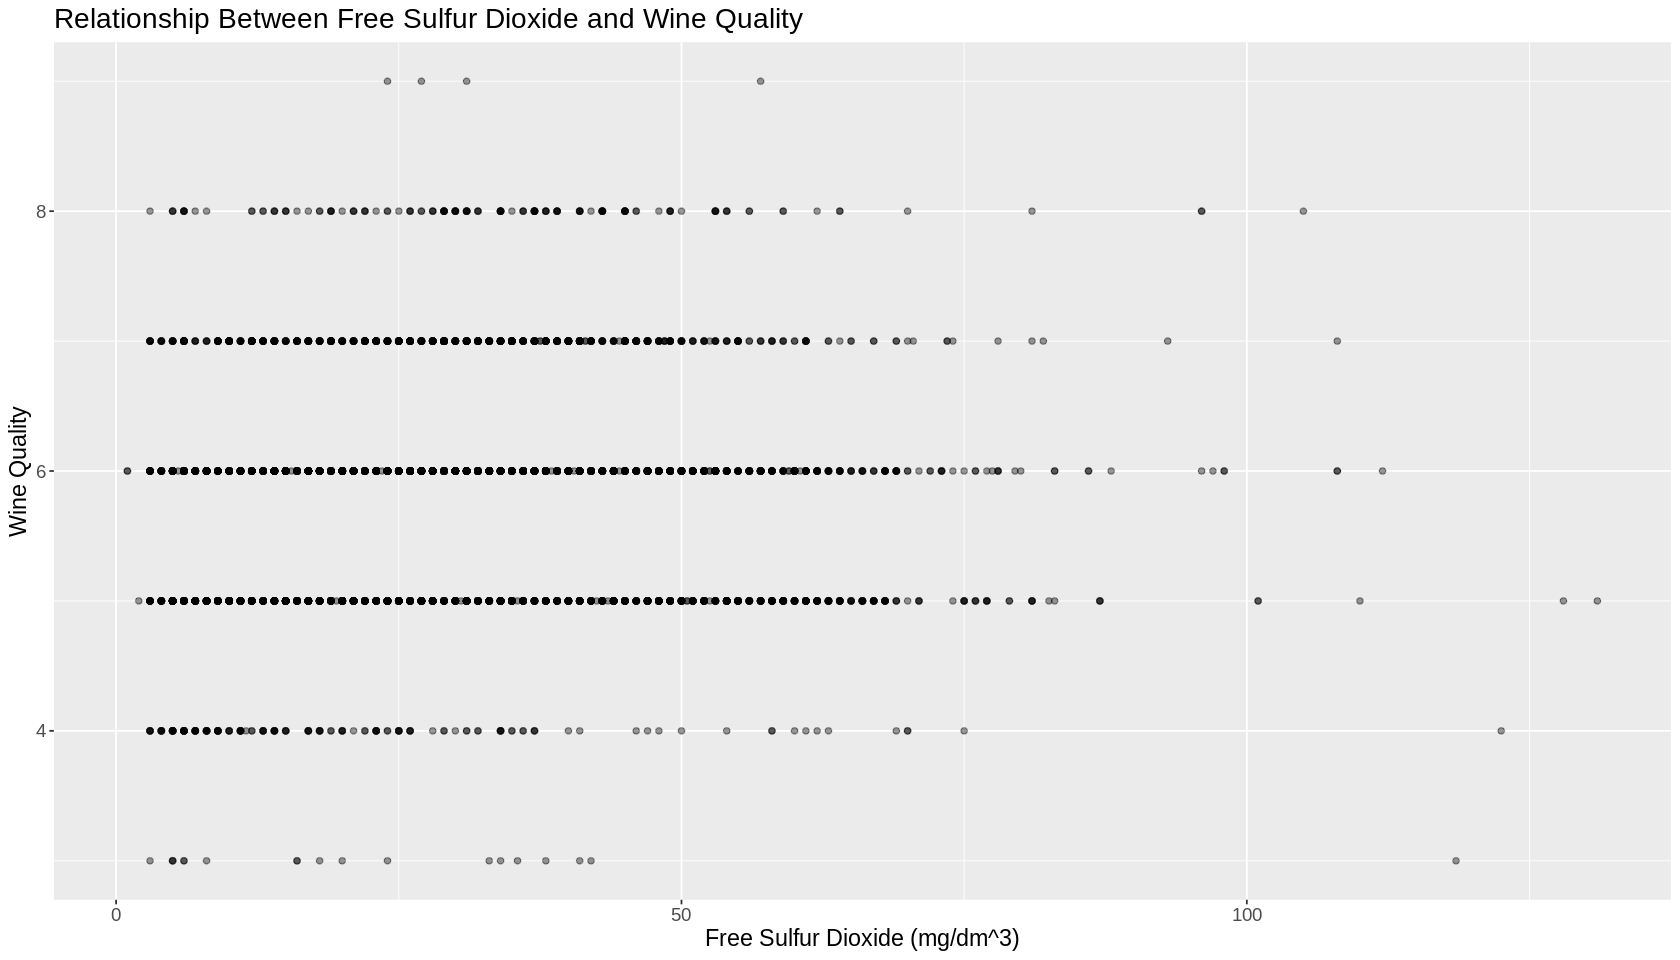

[1] -0.04279979

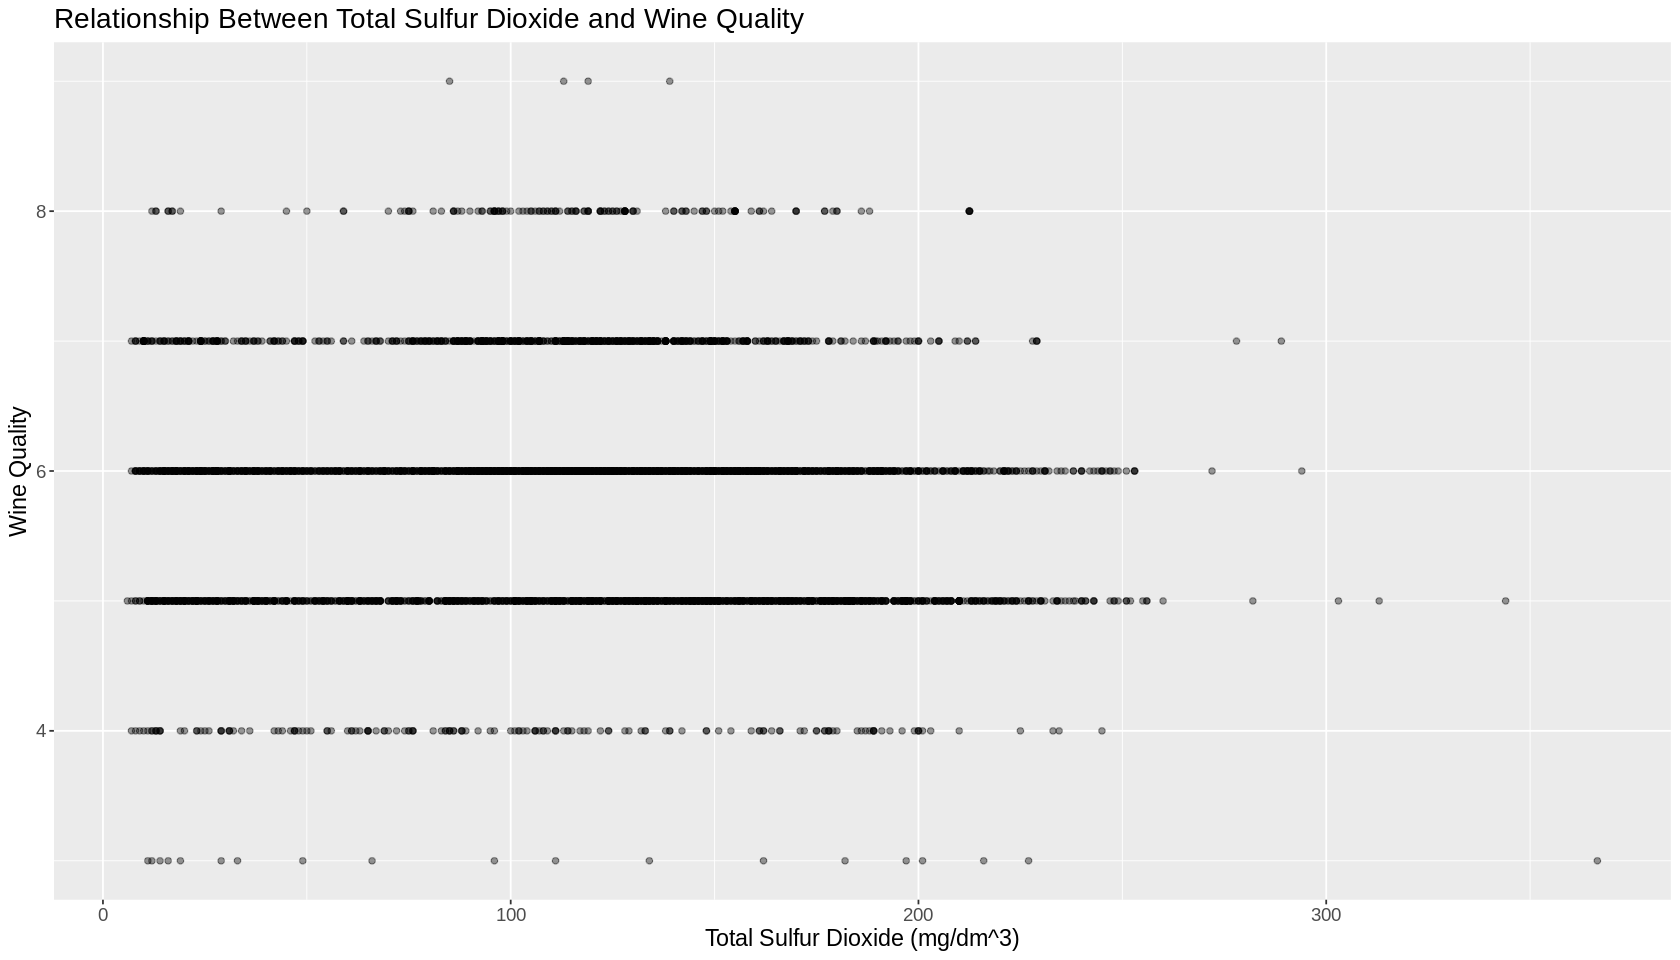

[1] -0.3145492

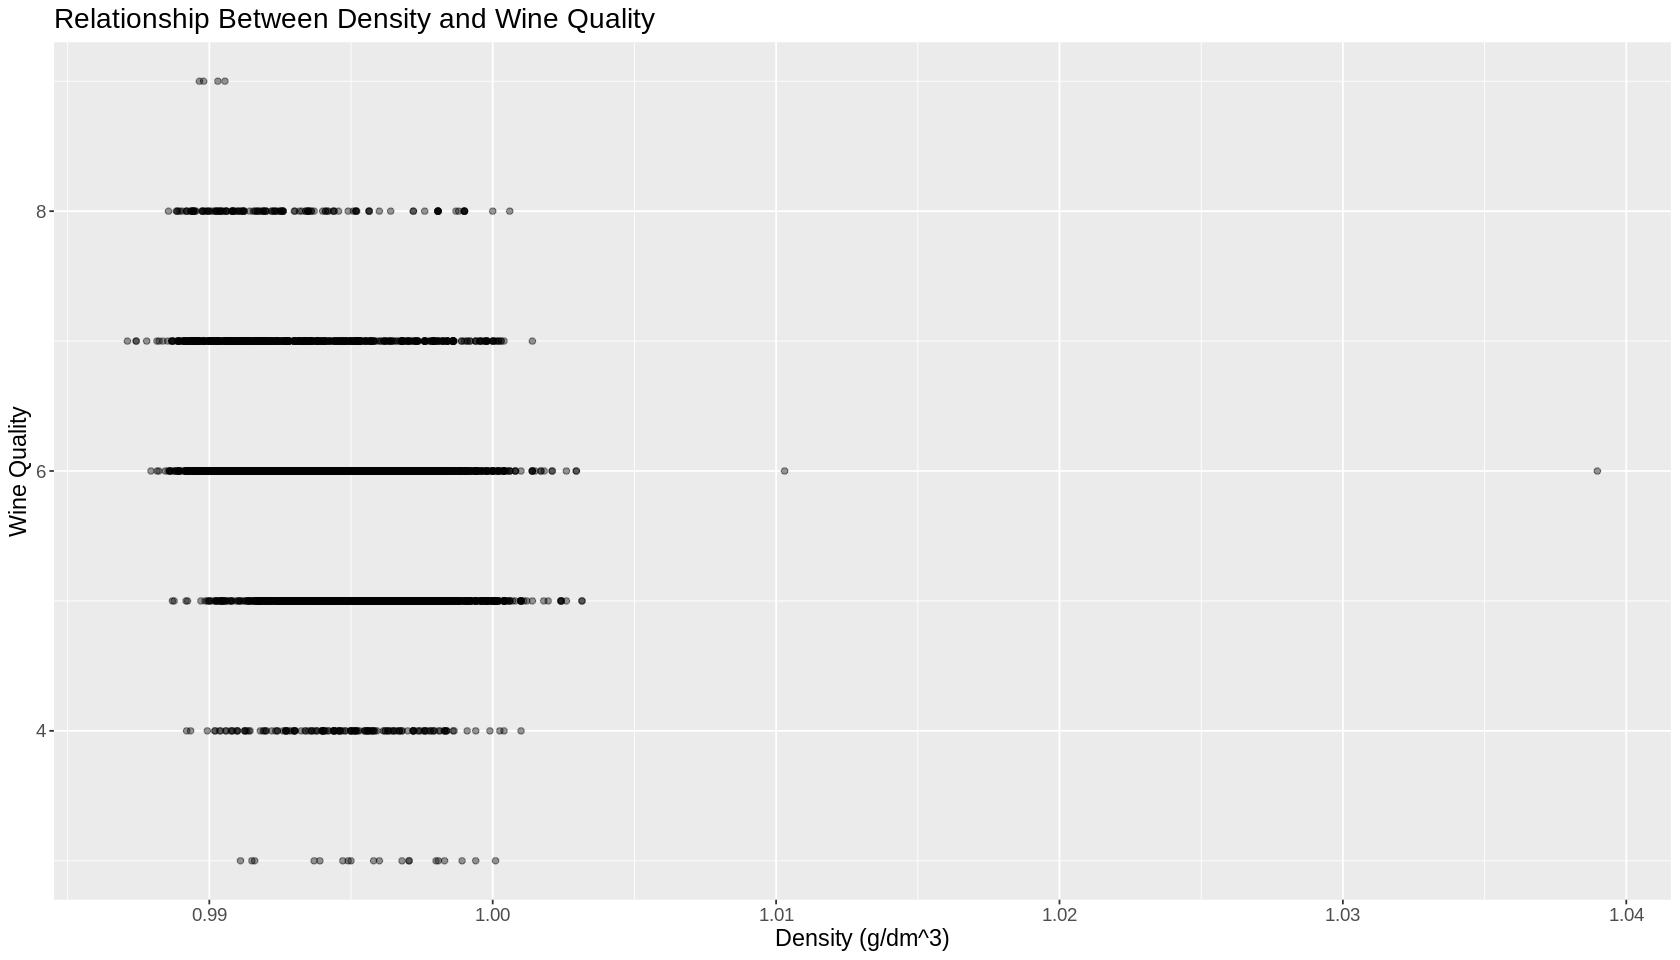

[1] 0.02776394

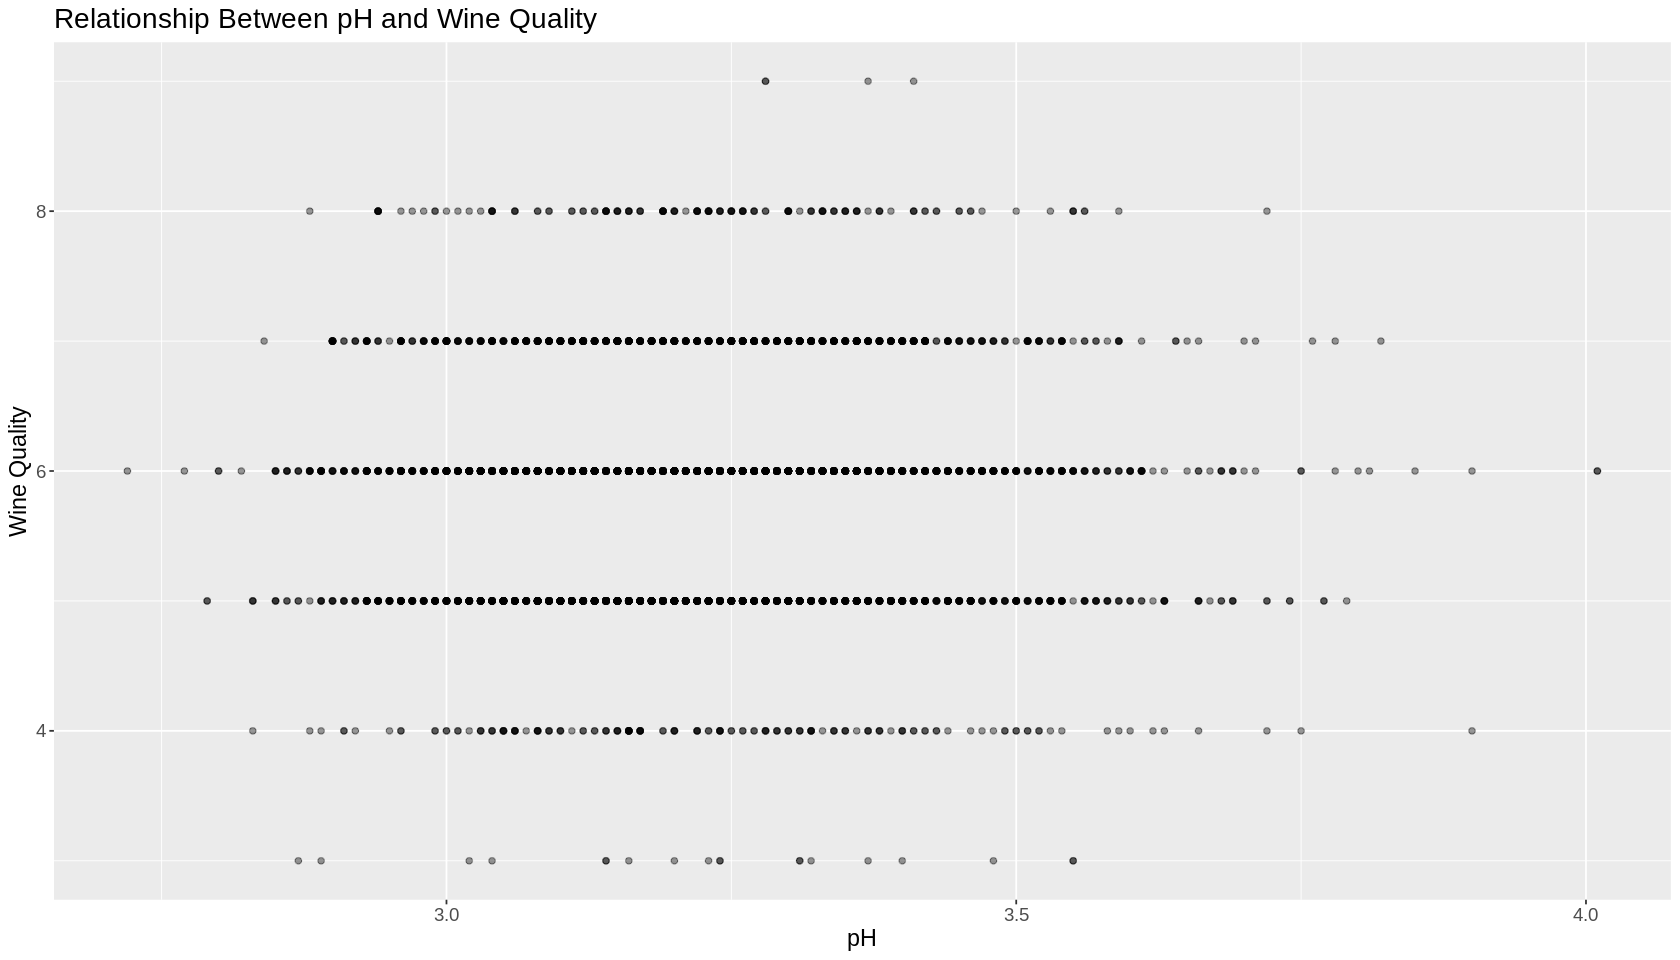

[1] 0.04224557

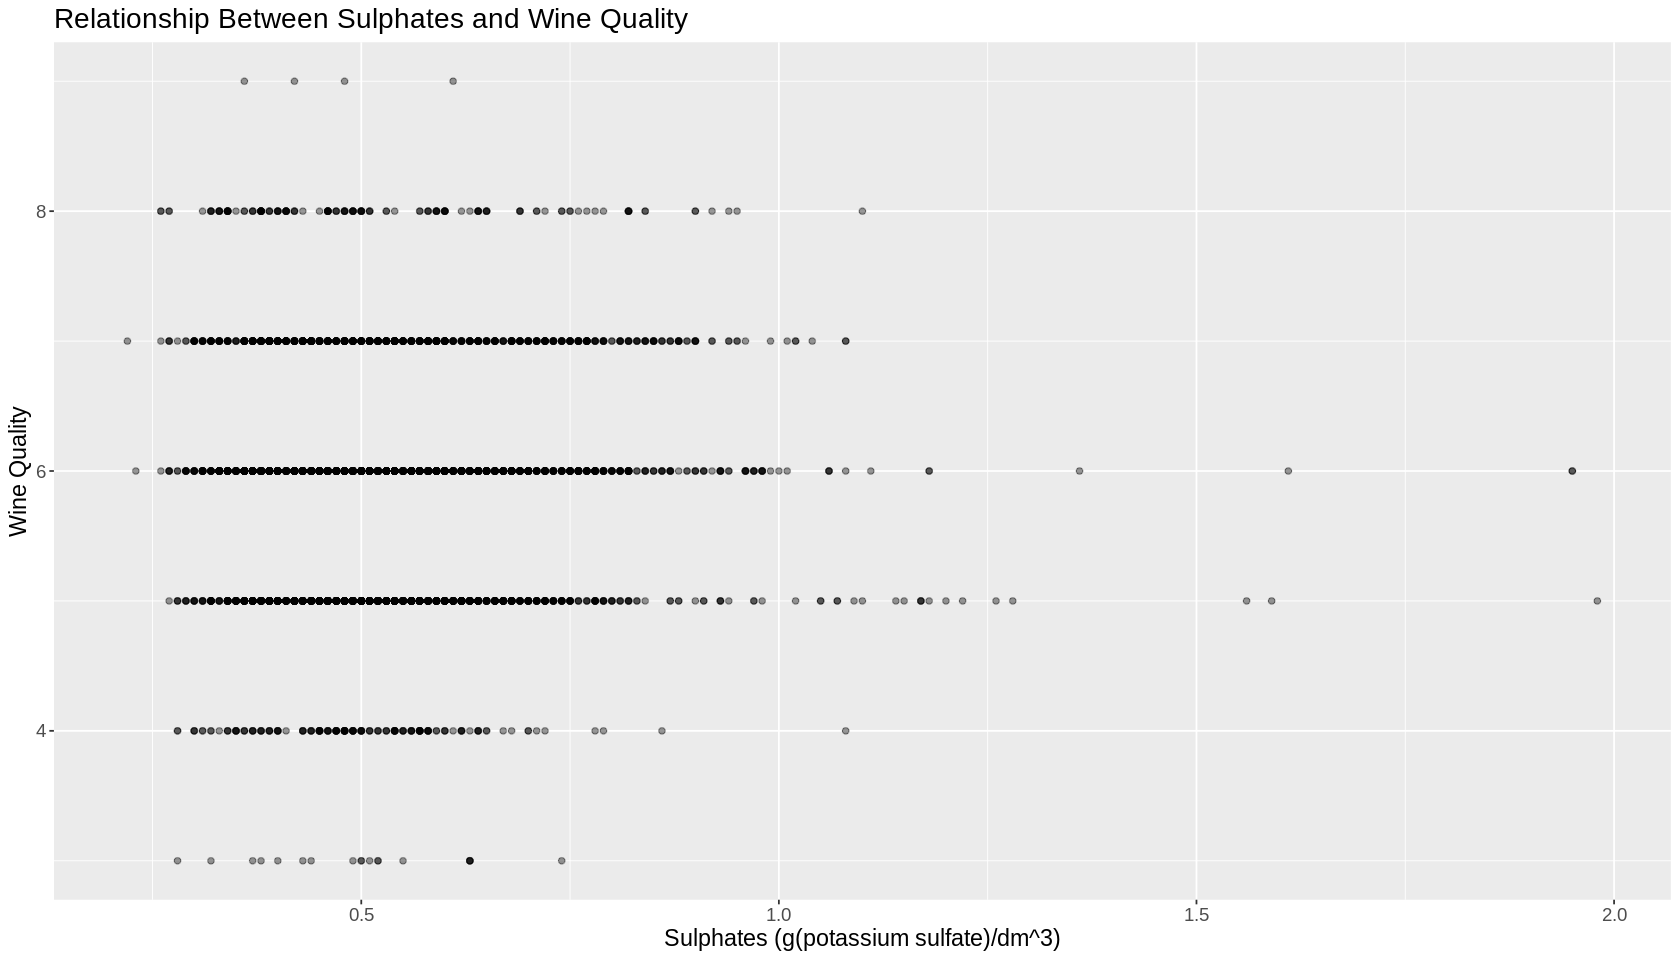

[1] 0.4393824

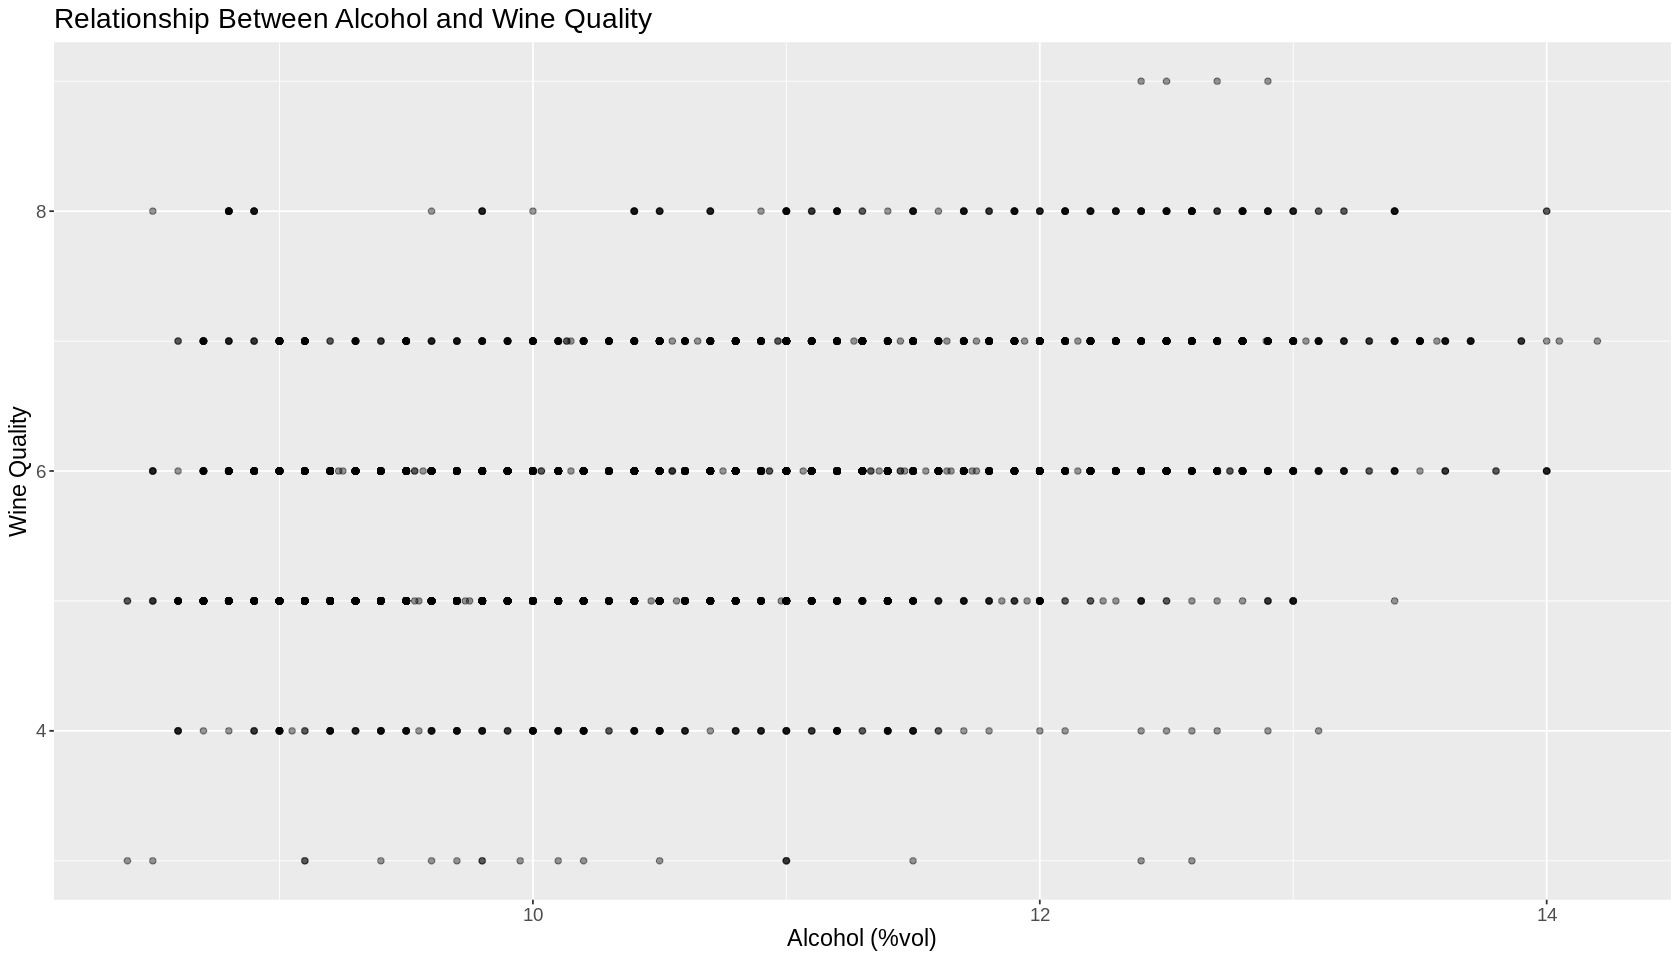

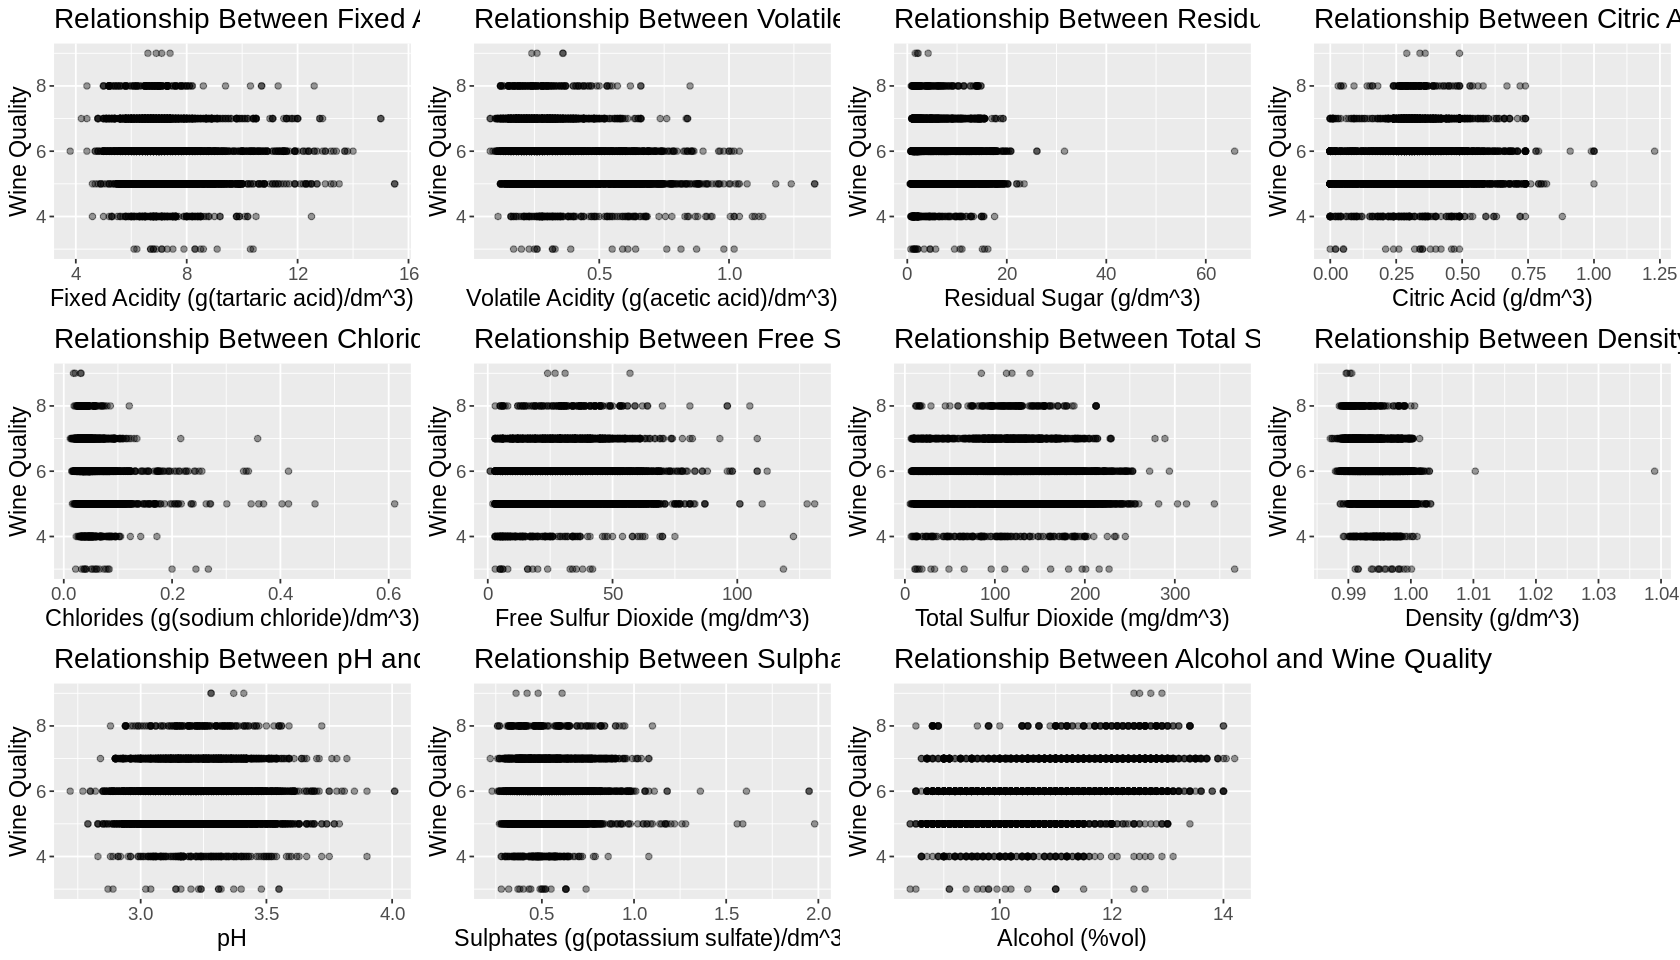

In [9]:
fixed_acidity_scatter <- ggplot(wine_training, aes(x = fixed_acidity, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Fixed Acidity (g(tartaric acid)/dm^3)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between Fixed Acidity and Wine Quality")
fixed_acidity_scatter

PearsonCorrelation_Fixed_Acidity <- cor(wine_training$fixed_acidity, wine_training$quality, method = c("pearson"))
PearsonCorrelation_Fixed_Acidity

volatile_acidity_scatter <- ggplot(wine_training, aes(x = volatile_acidity , y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Volatile Acidity (g(acetic acid)/dm^3)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between Volatile Acidity and Wine Quality")
volatile_acidity_scatter

PearsonCorrelation_Volatile_Acidity <- cor(wine_training$volatile_acidity, wine_training$quality, method = c("pearson"))
PearsonCorrelation_Volatile_Acidity

residual_sugar_scatter <- ggplot(wine_training, aes(x = residual_sugar, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Residual Sugar (g/dm^3)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between Residual Sugar and Wine Quality")
residual_sugar_scatter

PearsonCorrelation_Residual_Sugar <- cor(wine_training$residual_sugar, wine_training$quality, method = c("pearson"))
PearsonCorrelation_Residual_Sugar

citric_acid_scatter <- ggplot(wine_training, aes(x = citric_acid, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Citric Acid (g/dm^3)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between Citric Acid and Wine Quality")
citric_acid_scatter

PearsonCorrelation_Citric_Acid <- cor(wine_training$citric_acid, wine_training$quality, method = c("pearson"))
PearsonCorrelation_Citric_Acid

chlorides_scatter <- ggplot(wine_training, aes(x = chlorides, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Chlorides (g(sodium chloride)/dm^3)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between Chlorides and Wine Quality")
chlorides_scatter

PearsonCorrelation_Chlorides <- cor(wine_training$chlorides, wine_training$quality, method = c("pearson"))
PearsonCorrelation_Chlorides

free_sulfur_dioxide_scatter <- ggplot(wine_training, aes(x = free_sulfur_dioxide, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Free Sulfur Dioxide (mg/dm^3)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between Free Sulfur Dioxide and Wine Quality")
free_sulfur_dioxide_scatter

PearsonCorrelation_Free_Sulfur_Dioxide <- cor(wine_training$free_sulfur_dioxide, wine_training$quality, method = c("pearson"))
PearsonCorrelation_Free_Sulfur_Dioxide

total_sulfur_dioxide_scatter <- ggplot(wine_training, aes(x = total_sulfur_dioxide, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Total Sulfur Dioxide (mg/dm^3)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between Total Sulfur Dioxide and Wine Quality")
total_sulfur_dioxide_scatter

PearsonCorrelation_Total_Sulfur_Dioxide <- cor(wine_training$total_sulfur_dioxide, wine_training$quality, method = c("pearson"))
PearsonCorrelation_Total_Sulfur_Dioxide

density_scatter <- ggplot(wine_training, aes(x = density, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Density (g/dm^3)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between Density and Wine Quality")
density_scatter

PearsonCorrelation_Density <- cor(wine_training$density, wine_training$quality, method = c("pearson"))
PearsonCorrelation_Density

pH_scatter <- ggplot(wine_training, aes(x = pH, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("pH") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between pH and Wine Quality")
pH_scatter

PearsonCorrelation_pH <- cor(wine_training$pH, wine_training$quality, method = c("pearson"))
PearsonCorrelation_pH

sulphates_scatter <- ggplot(wine_training, aes(x = sulphates, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Sulphates (g(potassium sulfate)/dm^3)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between Sulphates and Wine Quality")
sulphates_scatter

PearsonCorrelation_Sulphates <- cor(wine_training$sulphates, wine_training$quality, method = c("pearson"))
PearsonCorrelation_Sulphates

alcohol_scatter <- ggplot(wine_training, aes(x = alcohol, y = quality)) +
  geom_point(alpha = 0.4) +
  xlab("Alcohol (%vol)") +
  ylab("Wine Quality") +
  theme(text = element_text(size = 14)) +
  ggtitle("Relationship Between Alcohol and Wine Quality")
alcohol_scatter

PearsonCorrelation_Alcohol <- cor(wine_training$alcohol, wine_training$quality, method = c("pearson"))
PearsonCorrelation_Alcohol

grid <- plot_grid(fixed_acidity_scatter, volatile_acidity_scatter, residual_sugar_scatter, citric_acid_scatter, chlorides_scatter, free_sulfur_dioxide_scatter, total_sulfur_dioxide_scatter, density_scatter, pH_scatter, sulphates_scatter, alcohol_scatter)
grid

We can see that fixed acidity, volatile acidity, residual sugar, free sulfur dioxide, and alcohol are moderately correlated with wine quality. In order to conduct our data analysis, we will first use a multivariate K-nearest neighbors-based approach and perform cross-validation to determine at which value of K the minimum RMSPE occurs. Using this K value, we will re-train our KNN regression model and then make predictions on the testing data set. The RMSPE will let us evaluate our model's accuracy. We will also use a multiple linear regression approach to calculate the line of best fit, including the intercept and slope coefficients, and we will evaluate any outliers. We will again compute the RMSPE. We will choose the model with the least bias (i.e., the lower RMSPE). If the linear regression model is the better fit, we will visualise our data using a flat plane; otherwise, we will use a flexible plane.